In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import pandas as pd

In [2]:
df = pandas.read_pickle("data/gedi/combined_df3.pkl")

In [3]:
df.columns


Index(['rh', 'dataset', 'rx_sample_start_index', 'rx_sample_count',
       'geolocation/latitude_bin0', 'geolocation/longitude_bin0',
       'geolocation/elevation_bin0', 'geolocation/elevation_lastbin',
       'geolocation/delta_time', 'shot_number', 'quality_flag', 'sensitivity',
       'solar_elevation', 'degrade_flag', 'elev_lowestmode',
       'elev_highestreturn', 'land_cover_data/landsat_treecover',
       'land_cover_data/modis_nonvegetated', 'land_cover_data/modis_treecover',
       'delta_time', 'rh_0', 'rh_25', 'rh_50', 'rh_75', 'rh_98',
       'surface_flag', 'y_norm2'],
      dtype='object')

In [6]:
df['y_normalized'] = df['y_norm2']
df.drop(columns=['y_norm2'], inplace=True)

In [11]:
df.head()

,rh,dataset,rx_sample_start_index,rx_sample_count,geolocation/latitude_bin0,geolocation/longitude_bin0,geolocation/elevation_bin0,geolocation/elevation_lastbin,geolocation/delta_time,shot_number,...,land_cover_data/modis_nonvegetated,land_cover_data/modis_treecover,delta_time,rh_0,rh_25,rh_50,rh_75,rh_98,surface_flag,y_normalized
0,"[-1.49, -0.41, 0.63, 1.79, 3.22, 4.6, 5.8, 6.8...",amazon,8951681.0,950.0,-2.453493,-63.875632,123.176104,-19.038720,5.097556e+07,3.790060e+16,...,11.0,60.0,5.097556e+07,-1.49,16.18,22.590000,26.629999,30.150000,1.0,"[0.0018443913, 0.0026491373, 0.003137401, 0.00..."
1,"[-0.26, 0.59, 1.53, 2.51, 3.37, 4.15, 4.94, 5....",amazon,100409621.0,911.0,-0.971673,-65.017819,126.656391,-9.709453,5.390758e+07,4.317080e+16,...,2.0,81.0,5.390758e+07,-0.26,14.57,18.200001,20.969999,25.620001,1.0,"[0.008776291, 0.008282145, 0.0072953394, 0.006..."
2,"[-11.35, -10.67, -10.07, -9.51, -9.02, -8.57, ...",amazon,12491741.0,841.0,-3.642403,-67.904974,149.011338,23.137018,5.123171e+07,3.836060e+16,...,11.0,82.0,5.123171e+07,-11.35,-3.70,-0.970000,1.270000,6.140000,1.0,"[0.009292028, 0.009292028, 0.009292028, 0.0092..."
3,"[-3.44, -2.8, -2.21, -1.68, -1.23, -0.78, -0.3...",amazon,108455341.0,866.0,-3.318882,-63.898476,102.027080,-27.602695,5.297191e+07,4.149060e+16,...,10.0,82.0,5.297191e+07,-3.44,5.84,11.530000,16.440001,24.459999,1.0,"[0.016051194, 0.01820464, 0.018896908, 0.01768..."
4,"[-2.95, -1.91, -1.23, -0.71, -0.26, 0.22, 0.67...",amazon,100629721.0,875.0,-2.941469,-60.204957,77.578610,-53.406756,4.141175e+07,2.072110e+16,...,24.0,62.0,4.141175e+07,-2.95,10.34,14.760000,17.010000,20.830000,1.0,"[0.0046613086, 0.0048677316, 0.00501164, 0.004..."


In [12]:
rh_values = np.concatenate(df['rh'].to_numpy())

print("Min of rh:", np.min(rh_values))
print("Max of rh:", np.max(rh_values))
print("Mean of rh:", np.mean(rh_values))
print("Standard Deviation of rh:", np.std(rh_values))

Min of rh: -102.68
Max of rh: 147.9
Mean of rh: 6.047675
Standard Deviation of rh: 9.398921


In [13]:
condition_columns = [
            'geolocation/latitude_bin0',
            'geolocation/longitude_bin0', 
            'geolocation/elevation_bin0',
            'land_cover_data/landsat_treecover',
            'land_cover_data/modis_nonvegetated', 
            'land_cover_data/modis_treecover'
        ]

In [14]:
print(np.round(df[condition_columns].describe()))

       geolocation/latitude_bin0  geolocation/longitude_bin0  \
count                  3000000.0                   3000000.0   
mean                        13.0                       -75.0   
std                         27.0                        20.0   
min                        -20.0                      -116.0   
25%                        -10.0                       -75.0   
50%                          0.0                       -70.0   
75%                         42.0                       -62.0   
max                         52.0                       -52.0   

       geolocation/elevation_bin0  land_cover_data/landsat_treecover  \
count                   3000000.0                          3000000.0   
mean                        675.0                               59.0   
std                         712.0                               45.0   
min                           1.0                                0.0   
25%                         208.0                              

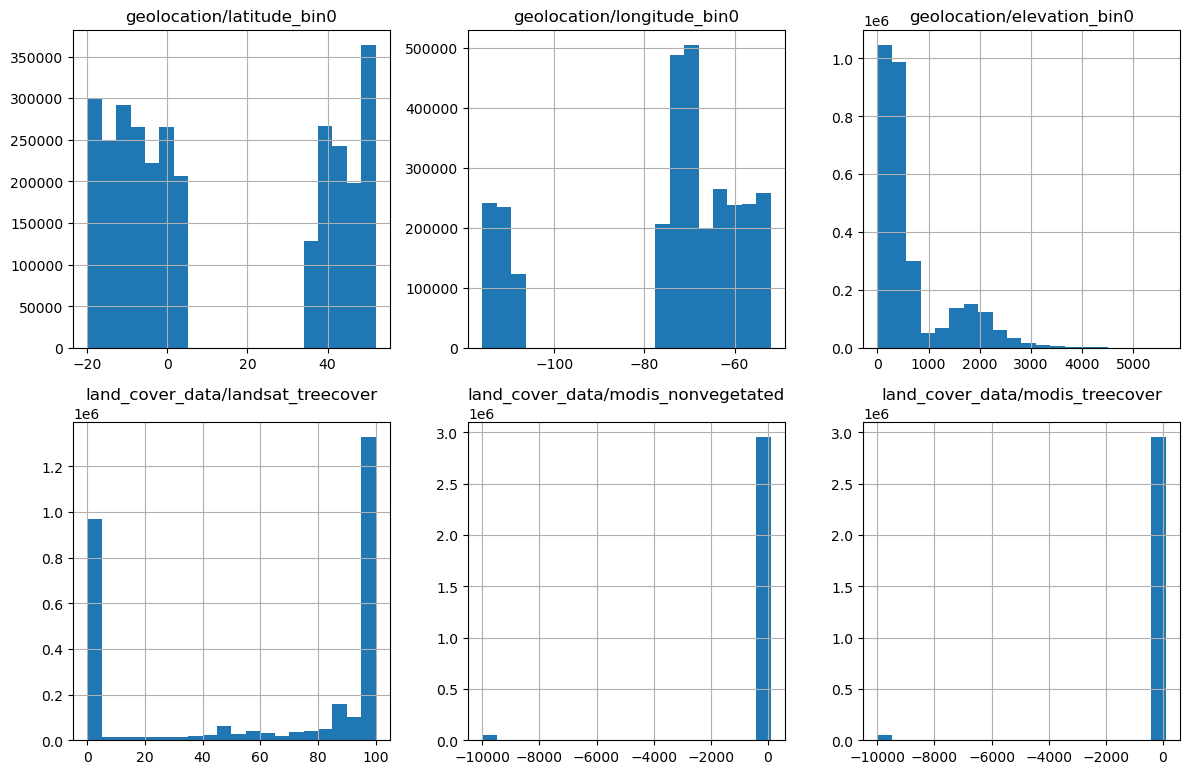

In [15]:
df[condition_columns].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

- Latitude (bin0) Range: (-20, 5), (35, 52)
- Longitude (bin0) Range: (-116, -106), (-77, -52)
- Elevation (bin0) Range: (0, 1000) [dense], (1000, 4500)

In [16]:
# Select rows where "land_cover_data/modis_nonvegetated" < 0 OR "land_cover_data/modis_treecover" < 0
cond_or = (df['land_cover_data/modis_nonvegetated'] < 0) | (df['land_cover_data/modis_treecover'] < 0)
num_rows_or = df[cond_or].shape[0]
print("Number of rows (OR condition):", num_rows_or)

# Select rows where "land_cover_data/modis_nonvegetated" < 0 AND "land_cover_data/modis_treecover" < 0
cond_and = (df['land_cover_data/modis_nonvegetated'] < 0) & (df['land_cover_data/modis_treecover'] < 0)
num_rows_and = df[cond_and].shape[0]
print("Number of rows (AND condition):", num_rows_and)

Number of rows (OR condition): 48062
Number of rows (AND condition): 48062


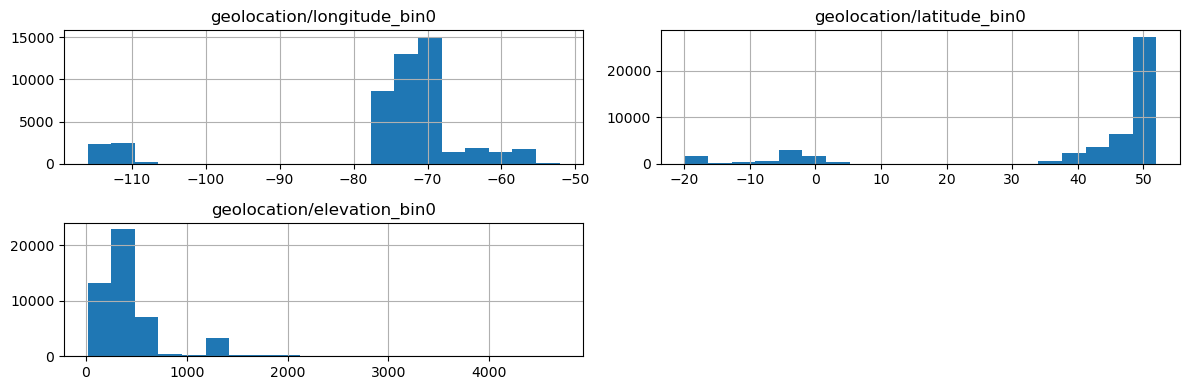

In [17]:
# Filter rows where "land_cover_data/modis_nonvegetated" < 0
subset = df[df['land_cover_data/modis_nonvegetated'] < 0]

# Define the columns for longitude, latitude, and elevation bin0
cols_to_plot = ['geolocation/longitude_bin0', 'geolocation/latitude_bin0', 'geolocation/elevation_bin0']

# Plot histograms for the selected columns
subset[cols_to_plot].hist(bins=20, figsize=(12, 4))
plt.tight_layout()
plt.show()

In [18]:
df2 = df[(df['land_cover_data/modis_nonvegetated'] >= 0) &
         (df['land_cover_data/modis_treecover'] >= 0)]
print(df2.shape)


(2951938, 27)


In [19]:
df2.to_pickle("data/gedi/combined_df_preproc2.pkl")


In [2]:
df2 = pandas.read_pickle("data/gedi/combined_df_preproc2.pkl")

In [21]:
import gc

del df
del rh_values
del subset
gc.collect()


0

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2951938 entries, 0 to 2999999
Data columns (total 27 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   rh                                  object 
 1   dataset                             object 
 2   y_normalized                        object 
 3   rx_sample_start_index               float64
 4   rx_sample_count                     float64
 5   geolocation/latitude_bin0           float64
 6   geolocation/longitude_bin0          float64
 7   geolocation/elevation_bin0          float64
 8   geolocation/elevation_lastbin       float64
 9   geolocation/delta_time              float64
 10  shot_number                         float64
 11  quality_flag                        float64
 12  sensitivity                         float64
 13  solar_elevation                     float64
 14  degrade_flag                        float64
 15  elev_lowestmode                     float64
 16  elev_

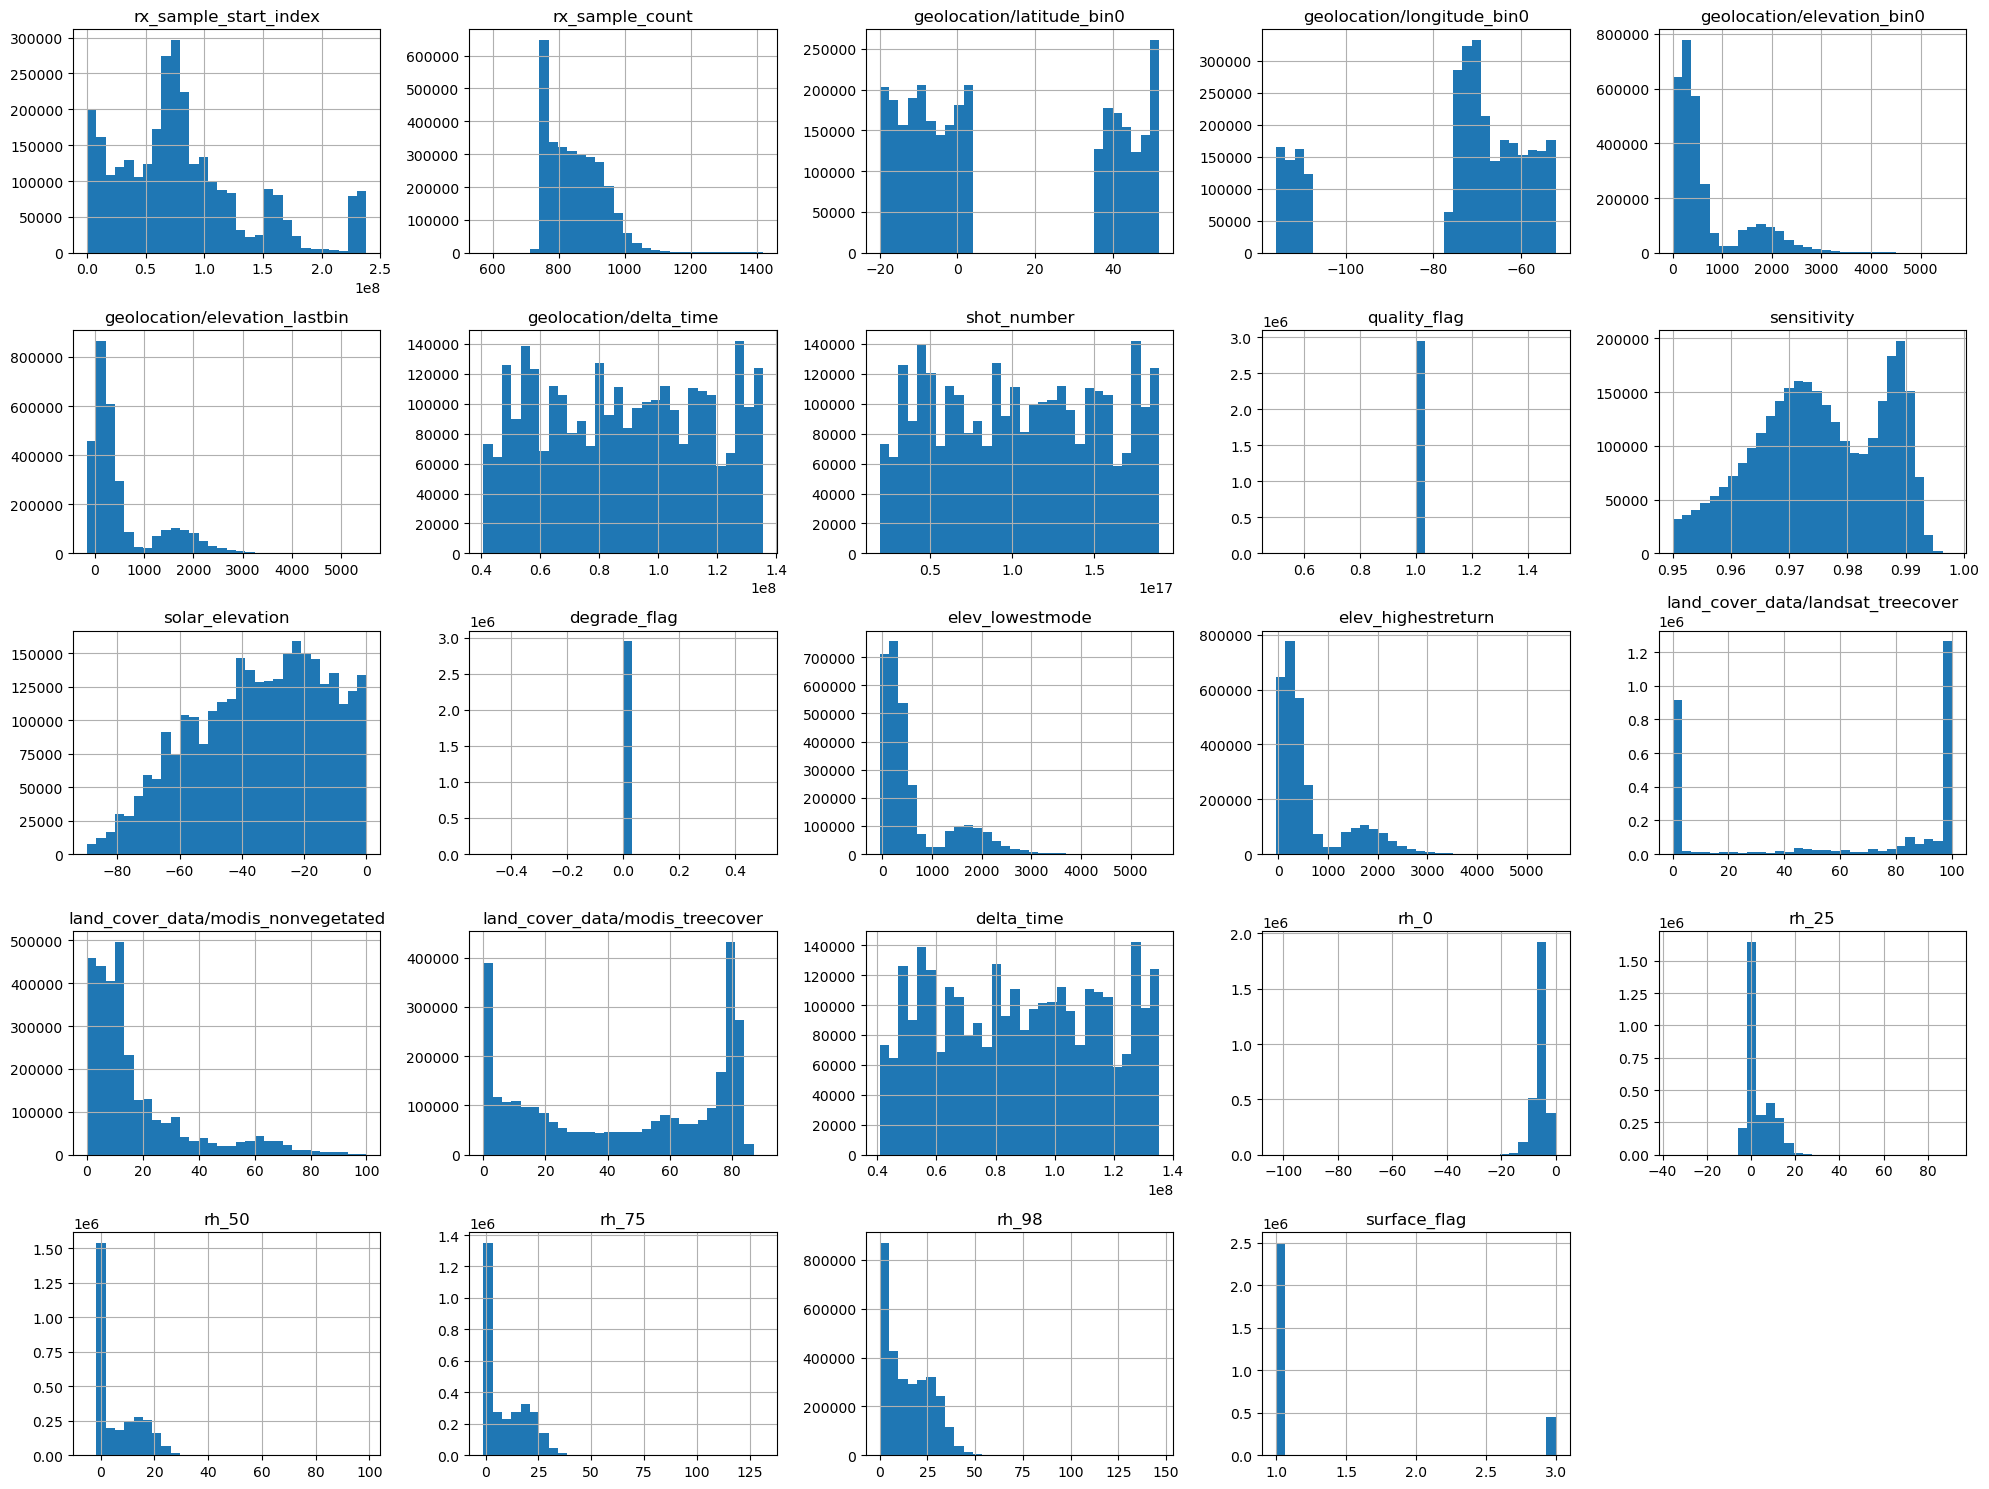

In [13]:
# Plot histograms for numeric columns
numeric_columns = df2.select_dtypes(include=[np.number]).columns.tolist()

df2[numeric_columns].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()


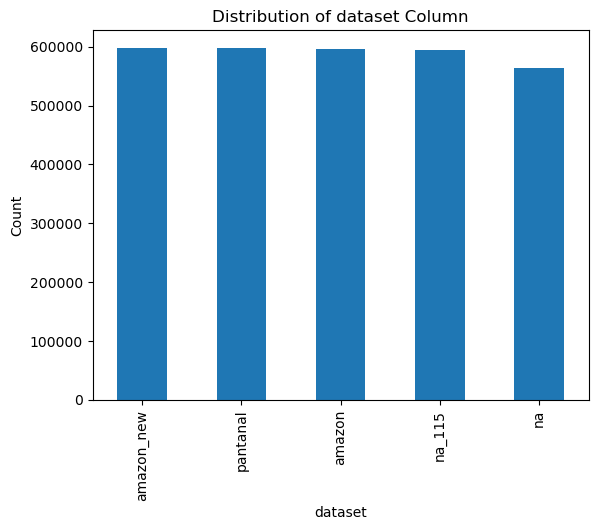

In [14]:
df2['dataset'].value_counts().plot(kind='bar', title='Distribution of dataset Column')
plt.xlabel('dataset')
plt.ylabel('Count')
plt.show()

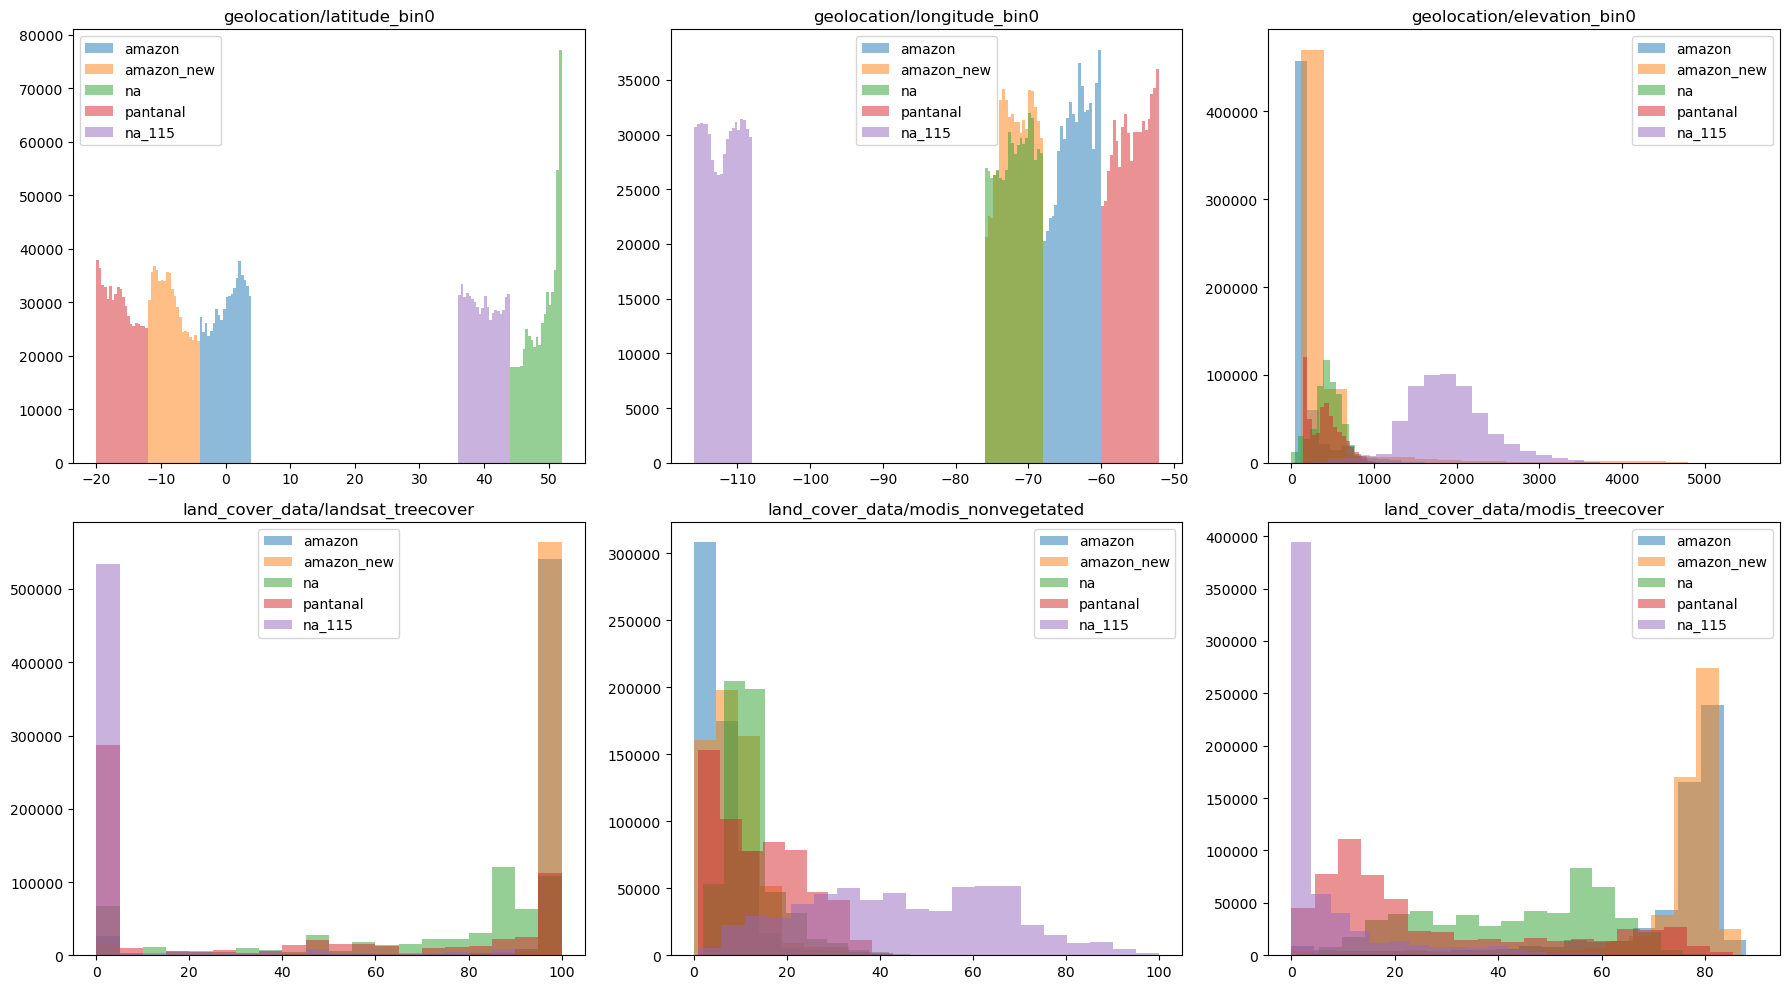

In [15]:
columns = ['geolocation/latitude_bin0', 'geolocation/longitude_bin0', 'geolocation/elevation_bin0',
           'land_cover_data/landsat_treecover', 'land_cover_data/modis_nonvegetated', 'land_cover_data/modis_treecover']
datasets = df2['dataset'].unique()

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()  # flatten to a 1D array for easy iteration

for ds in datasets:
    subset = df2[df2['dataset'] == ds]
    for ax, col in zip(axs, columns):
        ax.hist(subset[col], bins=20, alpha=0.5, label=ds)
        ax.set_title(col)
        ax.legend()
        
plt.tight_layout()
plt.show()

- Latitude (bin0) Range: (-20, 5), (35, 52)
- Longitude (bin0) Range: (-116, -108), (-77, -52)
- Elevation (bin0) Range: (0, 1000) [dense], (1000, 4500) [mainly na_115]
- Landsat treecover: too bimodal, not quite useful 
- Modis nonvegetated: (0, 40) [dense], (0, 100) [mainly na_115, sparse]
- Modis treecover: (0, 85), 2 modes at 0 [na_115] and 80 [amazon & amazon_new]



- what is modis: 
    - MODIS (Moderate Resolution Imaging Spectroradiometer) is a key instrument aboard NASA's Terra and Aqua satellites. It captures data in 36 spectral bands, providing information on land surface temperature, vegetation cover, and other environmental parameters.
    - MODIS data is used for various applications, including monitoring land cover changes, assessing vegetation health, and studying climate patterns.
- what is landsat:
    - Landsat is a series of Earth-observing satellites that have been capturing images of the Earth's surface since 1972. The Landsat program provides high-resolution imagery, which is used for land cover mapping, agricultural monitoring, and environmental studies.
    - Landsat data is valuable for long-term land use change analysis and provides a historical perspective on Earth's surface changes.


Original distribution across bins:
modis_treecover_bin
[0-10)      650035
[70-80)     575027
[80-90)     464747
[10-20)     325981
[60-70)     220701
[50-60)     217187
[20-30)     192530
[40-50)     153523
[30-40)     152205
[90-100)         2
Name: count, dtype: int64


/tmp/ipykernel_4046044/22941864.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_balanced = df2.groupby('modis_treecover_bin', group_keys=False).apply(



Shape of original dataframe: (2951938, 28)
Shape of balanced dataframe: (1698260, 27)


/tmp/ipykernel_4046044/22941864.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df2.groupby('modis_treecover_bin', group_keys=False).apply(


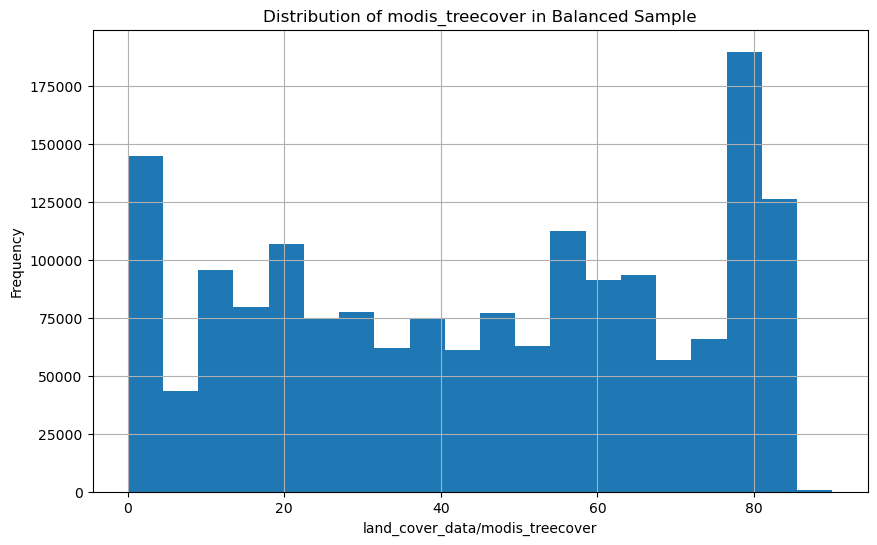


Balanced distribution across bins:
modis_treecover_bin
[0-10)      200000
[10-20)     200000
[50-60)     200000
[80-90)     200000
[70-80)     200000
[60-70)     200000
[20-30)     192530
[40-50)     153523
[30-40)     152205
[90-100)         2
Name: count, dtype: int64


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Define bins for the 'land_cover_data/modis_treecover' column
bin_edges = np.arange(0, 101, 10) # Bins of size 10 from 0 to 100
bin_labels = [f'[{i}-{i+10})' for i in bin_edges[:-1]]

# Create a new column with bin labels
df2['modis_treecover_bin'] = pd.cut(df2['land_cover_data/modis_treecover'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

# Calculate value counts for each bin
bin_counts = df2['modis_treecover_bin'].value_counts()
print("Original distribution across bins:")
print(bin_counts)

# Determine the number of samples per bin (e.g., cap at a certain number or use the minimum)
# Let's cap the number of samples per bin to make it more balanced, e.g., 50000
# Or find a bin with a reasonable number of samples and use that as the cap
# Let's look at the counts and decide. The counts vary significantly.
# Let's try capping at the count of a less populated bin, or a fixed number like 50k or 100k.
# Choosing 50,000 as a target sample size per bin.
n_samples_per_bin = 200000

# Sample from each bin
df_balanced = df2.groupby('modis_treecover_bin', group_keys=False).apply(
    lambda x: x.sample(min(len(x), n_samples_per_bin), random_state=42)
)

# Drop the temporary bin column
df_balanced = df_balanced.drop(columns=['modis_treecover_bin'])

print(f"\nShape of original dataframe: {df2.shape}")
print(f"Shape of balanced dataframe: {df_balanced.shape}")

# Plot the distribution of the balanced dataframe
plt.figure(figsize=(10, 6))
df_balanced['land_cover_data/modis_treecover'].hist(bins=20)
plt.title('Distribution of modis_treecover in Balanced Sample')
plt.xlabel('land_cover_data/modis_treecover')
plt.ylabel('Frequency')
plt.show()

# Display value counts for the balanced data bins (optional check)
df_balanced['modis_treecover_bin'] = pd.cut(df_balanced['land_cover_data/modis_treecover'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)
print("\nBalanced distribution across bins:")
print(df_balanced['modis_treecover_bin'].value_counts())
df_balanced = df_balanced.drop(columns=['modis_treecover_bin']) # Clean up again

In [5]:
# the balanced dataframe Export to a pickle file
df_balanced.to_pickle("data/gedi/combined_df_balanced.pkl")

print("Balanced dataframe exported to data/gedi/combined_df_balanced.pkl") 

Balanced dataframe exported to data/gedi/combined_df_balanced.pkl


In [6]:
print("Original dataframe shape:", df2.shape)
print("Balanced dataframe shape:", df_balanced.shape)

Original dataframe shape: (2951938, 28)
Balanced dataframe shape: (1698260, 27)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_balanced = pd.read_pickle("data/gedi/combined_df_balanced.pkl")
print(df_balanced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1698260 entries, 2407147 to 2003095
Data columns (total 27 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   rh                                  object 
 1   dataset                             object 
 2   y_normalized                        object 
 3   rx_sample_start_index               float64
 4   rx_sample_count                     float64
 5   geolocation/latitude_bin0           float64
 6   geolocation/longitude_bin0          float64
 7   geolocation/elevation_bin0          float64
 8   geolocation/elevation_lastbin       float64
 9   geolocation/delta_time              float64
 10  shot_number                         float64
 11  quality_flag                        float64
 12  sensitivity                         float64
 13  solar_elevation                     float64
 14  degrade_flag                        float64
 15  elev_lowestmode                     float64
 16 

In [ ]:
# Renormalize the 'y_normalized' column: 
# for each row convert the list to a numpy array, subtract mean_y, and divide by std_y.
# compute mean and standard deviation across all y arrays
y_stack = np.vstack(df_balanced['y_normalized'].to_numpy())
mean_y = y_stack.mean()
std_y = y_stack.std()
print(f"mean_y: {mean_y}, std_y: {std_y}")
#df_balanced['y_normalized'] = df_balanced['y_normalized'].apply(lambda y: (np.array(y) - mean_y) / std_y)

mean_y: 0.001953125, std_y: 0.004507618024945259


In [4]:
# Compute and print the new overall mean and standard deviation of the renormalized 'y_normalized' column.
#y_array_new = np.vstack(df_balanced['y_normalized'].to_numpy())
#new_mean = np.mean(y_array_new)
#new_std = np.std(y_array_new)
#print(f"New mean: {new_mean}, New std: {new_std}")

In [8]:
from sklearn.model_selection import train_test_split
# Define bins for the 'land_cover_data/modis_treecover' column
bin_edges = np.arange(0, 101, 10) # Bins of size 10 from 0 to 100
bin_labels = [f'[{i}-{i+10})' for i in bin_edges[:-1]]

In [ ]:
# Create a categorical column for stratification based on the modis_treecover column.
# We use the bin_edges and bin_labels defined earlier in cell 27.
df_balanced['modis_treecover_cat'] = pd.cut(
    df_balanced['land_cover_data/modis_treecover'],
    bins=bin_edges,
    labels=bin_labels,
    right=False,
    include_lowest=True
)

# Perform stratified splitting using the new categorical column.
train, temp = train_test_split(
    df_balanced,
    test_size=0.1,
    random_state=42,
    stratify=df_balanced['modis_treecover_cat']
)
val, test = train_test_split(
    temp,
    test_size=0.5,
    random_state=42,
    stratify=temp['modis_treecover_cat']
)

# Drop the temporary stratification column from the splits.
train = train.drop(columns=['modis_treecover_cat'])
val = val.drop(columns=['modis_treecover_cat'])
test = test.drop(columns=['modis_treecover_cat'])

# Save the splits to pickle files.
train.to_pickle("data/gedi/combined_df_train.pkl")
val.to_pickle("data/gedi/combined_df_val.pkl")
test.to_pickle("data/gedi/combined_df_test.pkl")

print("Train shape:", train.shape)
print("Validation shape:", val.shape)
print("Test shape:", test.shape)
print("Pickle files saved to disk.")


Train shape: (1528434, 27)
Validation shape: (84913, 27)
Test shape: (84913, 27)
Pickle files saved to disk.


: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the training set from disk
plot_df = pd.read_pickle("data/gedi/combined_df2.pkl")

# Quick check
print("Train set shape:", plot_df.shape)
plot_df.info()

Train set shape: (3000000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 28 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   y                                   object 
 1   rh                                  object 
 2   dataset                             object 
 3   y_normalized                        object 
 4   rx_sample_start_index               float64
 5   rx_sample_count                     float64
 6   geolocation/latitude_bin0           float64
 7   geolocation/longitude_bin0          float64
 8   geolocation/elevation_bin0          float64
 9   geolocation/elevation_lastbin       float64
 10  geolocation/delta_time              float64
 11  shot_number                         float64
 12  quality_flag                        float64
 13  sensitivity                         float64
 14  solar_elevation                     float64
 15  degrade_flag      

In [3]:
plot_df['y_norm2'] = plot_df['y_normalized'].apply(lambda y: np.array(y, dtype=np.float32) * 20)

In [4]:
plot_df = plot_df.drop(columns=['y', 'y_normalized'])

In [5]:
plot_df.to_pickle("data/gedi/combined_df3.pkl")
print("DataFrame exported to data/gedi/combined_df3.pkl")

DataFrame exported to data/gedi/combined_df3.pkl


/tmp/ipykernel_4023103/3053300234.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (bin_interval, grp) in zip(axes, list(plot_df.groupby('tree_bin'))[:10]):


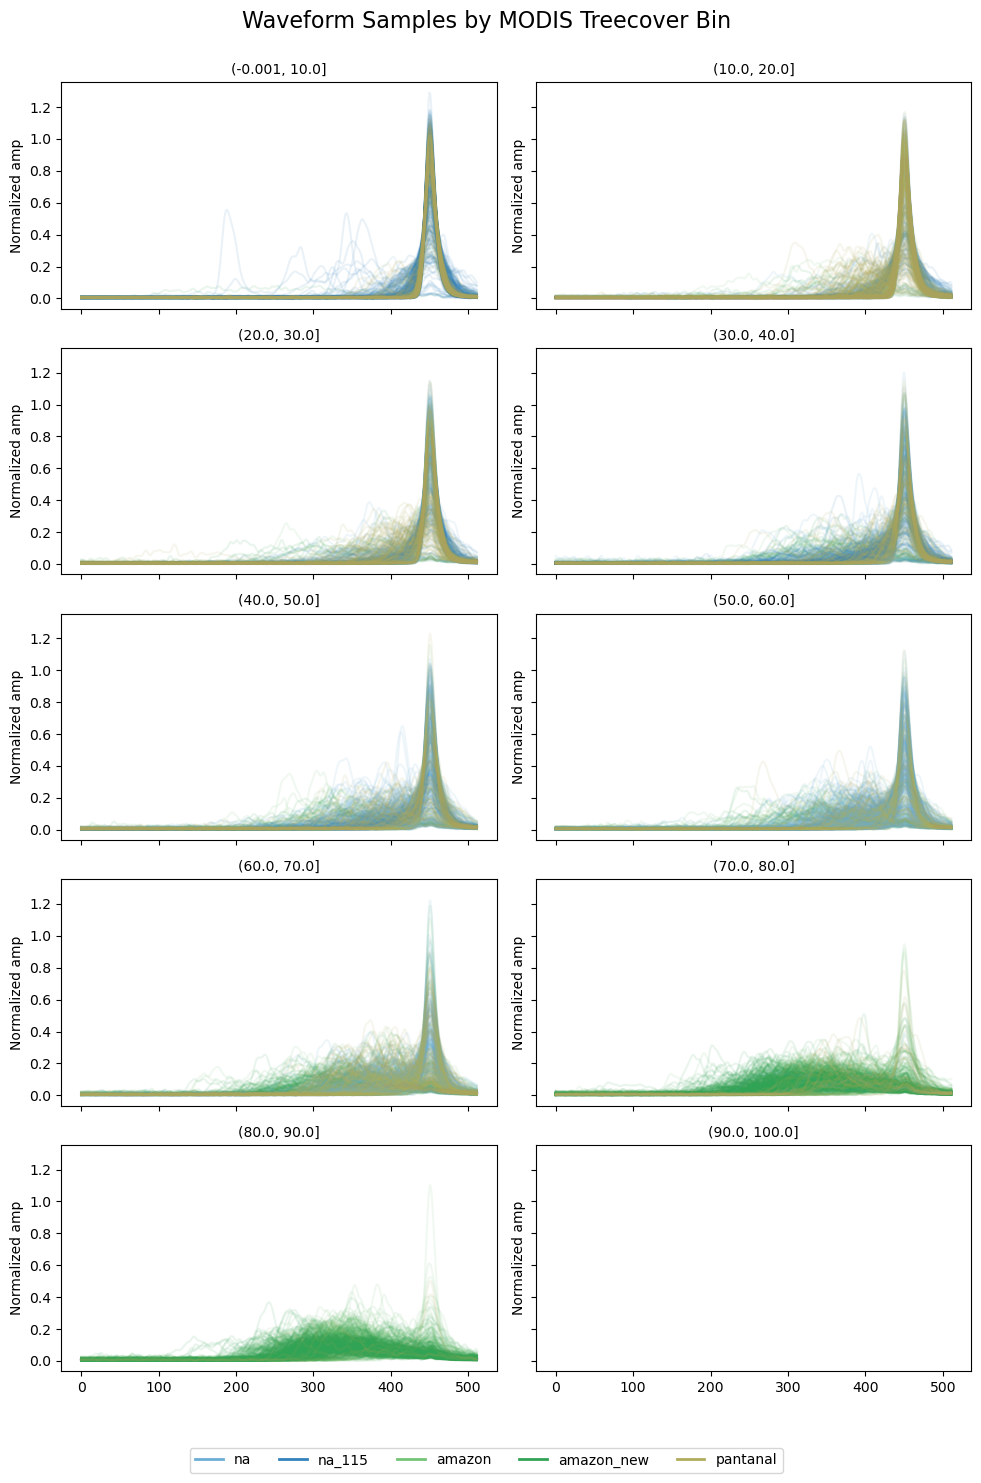

: 

In [ ]:
# Bin into 10 equal‐width bins and keep labels
bin_edges = np.arange(0, 101, 10)
plot_df['tree_bin'] = pd.cut(
    plot_df['land_cover_data/modis_treecover'],
    bins=bin_edges,
    include_lowest=True
)

# prepare 5×2 grid
fig, axes = plt.subplots(5, 2, figsize=(10, 14), sharex=True, sharey=True)
axes = axes.flatten()

# manual color mapping: similar hues for pairs
color_map = {
    'na':        '#6baed6',
    'na_115':    '#3182bd',
    'amazon':    '#74c476',
    'amazon_new':'#31a354',
    'pantanal':  '#b1ab5d'
}

fig.suptitle('Waveform Samples by MODIS Treecover Bin', fontsize=16, y=1)

# plot only first 9 bins
for ax, (bin_interval, grp) in zip(axes, list(plot_df.groupby('tree_bin'))[:10]):
    sample_grp = grp.sample(n=min(len(grp), 500), random_state=42)
    for ds, ds_grp in sample_grp.groupby('dataset'):
        clr = color_map.get(ds, '#999999')
        for y in ds_grp['y_norm2']:
            ax.plot(y, color=clr, alpha=0.1)
    ax.set_title(f'{bin_interval}', fontsize=10)
    ax.set_ylabel('Normalized amp')
    #ax.set_ylim(0, 1500)

# legend at bottom center
handles = [plt.Line2D([0], [0], color=color_map[ds], lw=2) for ds in color_map]
fig.legend(handles, list(color_map.keys()),
           loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=len(color_map))

plt.tight_layout()
plt.show()

# clean up
plot_df.drop(columns=['tree_bin'], inplace=True)
